#Projeto 1: Sistema de Gestão de Notas de Alunos

**Lidando com Arquivos, Pacotes e Módulos**

Objetivo: O objetivo deste projeto é desenvolver um sistema de gestão de notas de alunos em Python, que faça uso de manipulação de arquivos CSV, módulos e pacotes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparando o ambiente

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/PRETALAB/Projeto 1/

/content/drive/MyDrive/PRETALAB/Projeto 1


In [ ]:
import os
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Projeto 1


In [ ]:
!ls

'Carolyne Santos de Oliveira - Projeto1.ipynb'	 notas.csv
 medias_finais.csv				 relatorio_final.csv


## Cenário



1. Leitura e manipulação de arquivos CSV:

O sistema deve carregar os dados de notas de um arquivo CSV contendo as seguintes colunas:

 - Matrícula

- Nome do Aluno

- Disciplina

- Nota 1

- Nota 2

- Nota 3

- Nota Final

O arquivo de notas está em anexo como notas.csv

2. Divisão em Módulos:

- Módulo de manipulação de arquivos: Função que lê o arquivo CSV e retornam os dados.

- Módulo de análise de notas: Função que calcula a média final dos alunos e identifica se o aluno está aprovado (média ≥ 6) ou reprovado.

- Módulo de geração de relatórios: Função para gerar um arquivo CSV com as médias finais e o status de aprovação de cada aluno.

3. Relatórios:

O sistema deve gerar um arquivo CSV que contenha a média final de cada aluno e o status de aprovado ou reprovado.




**Estrutura do Projeto:**


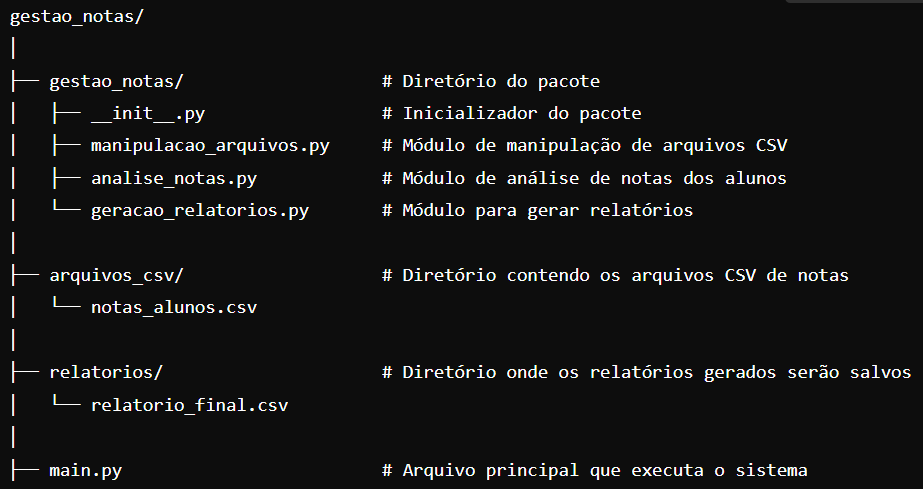

In [ ]:
#Abrindo arquivo no modo leitura
arquivo = open('notas.csv', 'r')
#Lendo todo o conteudo do arquivo
conteudo = arquivo.read()
print(conteudo)
#Necessario fechar o arquivo para ele nao ocupar a sua memória
arquivo.close()

In [ ]:
#Instalando a Biblioteca
import pandas as pd

In [ ]:
#Carregar dados do aquivo 'notas.csv'
df = pd.read_csv('notas.csv')

In [ ]:
#Visualizar arquivo
df.head()

,Matrícula,Nome do Aluno,Disciplina,Nota 1,Nota 2,Nota 3
0,100,Pedro Almeida,Matemática,6.9,8.7,6.8
1,100,Pedro Almeida,Física,2.3,1.9,5.6
2,100,Pedro Almeida,Português,1.2,4.9,8.5
3,100,Pedro Almeida,História,9.6,3.1,3.4
4,100,Pedro Almeida,Geografia,3.6,3.5,0.2


In [ ]:
# Função que calcula a nota final do aluno
def nota_final(notas):
    return round((notas['Nota 1'] + notas['Nota 2'] + notas['Nota 3']) / 3, 1)

# Criar uma coluna 'Nota Final' no DataFrame
df['Nota Final'] = df.apply(nota_final, axis=1)

# Visualizar nosso DataFrame
df.head()

,Matrícula,Nome do Aluno,Disciplina,Nota 1,Nota 2,Nota 3,Nota Final
0,100,Pedro Almeida,Matemática,6.9,8.7,6.8,7.5
1,100,Pedro Almeida,Física,2.3,1.9,5.6,3.3
2,100,Pedro Almeida,Português,1.2,4.9,8.5,4.9
3,100,Pedro Almeida,História,9.6,3.1,3.4,5.4
4,100,Pedro Almeida,Geografia,3.6,3.5,0.2,2.4


In [ ]:
# Função que calcula a nota final do aluno, arredondando para 1 casa decimal
def nota_final(notas):
    return round((notas['Nota 1'] + notas['Nota 2'] + notas['Nota 3']) / 3, 1)

# Criar uma coluna 'Nota Final' no DataFrame
df['Nota Final'] = df.apply(nota_final, axis=1)

# Visualizar nosso DataFrame
df.head()

,Matrícula,Nome do Aluno,Disciplina,Nota 1,Nota 2,Nota 3,Nota Final
0,100,Pedro Almeida,Matemática,6.9,8.7,6.8,7.5
1,100,Pedro Almeida,Física,2.3,1.9,5.6,3.3
2,100,Pedro Almeida,Português,1.2,4.9,8.5,4.9
3,100,Pedro Almeida,História,9.6,3.1,3.4,5.4
4,100,Pedro Almeida,Geografia,3.6,3.5,0.2,2.4


In [ ]:
# Função que calcula a média final e identifica se o aluno está aprovado ou reprovado
def media_final(notas):
    media = round((notas['Nota 1'] + notas['Nota 2'] + notas['Nota 3']) / 3, 1)
    status = "Aprovado" if media >= 6 else "Reprovado"
    return media, status

# Aplicar a função e criar colunas para 'Média Final' e 'Status'
df[['Nota Final', 'Status']] = df.apply(media_final, axis=1, result_type='expand') #result_type, funciona como um arrastar a formula do excel. Ele aplica a função que eu quero a outras linhas e colunas

# Visualizar nosso DataFrame
df.head()

,Matrícula,Nome do Aluno,Disciplina,Nota 1,Nota 2,Nota 3,Nota Final,Status
0,100,Pedro Almeida,Matemática,6.9,8.7,6.8,7.5,Aprovado
1,100,Pedro Almeida,Física,2.3,1.9,5.6,3.3,Reprovado
2,100,Pedro Almeida,Português,1.2,4.9,8.5,4.9,Reprovado
3,100,Pedro Almeida,História,9.6,3.1,3.4,5.4,Reprovado
4,100,Pedro Almeida,Geografia,3.6,3.5,0.2,2.4,Reprovado


In [ ]:
# Função para salvar o DataFrame em um arquivo CSV
def salvar_csv(nome_arquivo):
    df.to_csv(nome_arquivo, index=False)

# Chamar a função para salvar os dados
salvar_csv('medias_finais.csv')

In [ ]:
# Selecionar apenas as colunas desejadas
relatorio_final = df[['Matrícula', 'Nome do Aluno', 'Disciplina', 'Nota Final', 'Status']]

# Chamar a função para salvar os dados
salvar_csv('relatorio_final.csv')

# Visualizar nosso relatório
relatorio_final.head(15)

,Matrícula,Nome do Aluno,Disciplina,Nota Final,Status
0,100,Pedro Almeida,Matemática,7.5,Aprovado
1,100,Pedro Almeida,Física,3.3,Reprovado
2,100,Pedro Almeida,Português,4.9,Reprovado
3,100,Pedro Almeida,História,5.4,Reprovado
4,100,Pedro Almeida,Geografia,2.4,Reprovado
5,101,Fernanda Mendes,Matemática,2.0,Reprovado
6,101,Fernanda Mendes,Física,4.2,Reprovado
7,101,Fernanda Mendes,Português,2.3,Reprovado
8,101,Fernanda Mendes,História,1.6,Reprovado
9,101,Fernanda Mendes,Geografia,6.0,Aprovado


Acima fiz a media final do aluno por matéria

Tenho como fazer uma coluna se o aluno vai passar de ano com base na quantidade de aprovações ou reprovações que ele teve?